# BOSTON PREDICTION
##### CRIM: This is the per capita crime rate by town
##### INDUS: This is the proportion of non-retail business acres per town.
##### CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
##### NOX: This is the nitric oxides concentration (parts per 10 million)
##### RM: This is the average number of rooms per dwelling
##### AGE: This is the proportion of owner-occupied units built prior to 1940
##### DIS: This is the weighted distances to five Boston employment centers
##### TAX: This is the full-value property-tax rate per 10000 dollars
##### PTRATIO: This is the pupil-teacher ratio by town
##### B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
##### MEDV: This is the median value of owner-occupied homes in 1000 dollars
##### You are interested in building a model that will predict housing values in Boston suburbs using various predictor variables that you have available.Use Multiple Linear Regression to build your model, with the median value of owner-occupied homes as the target variable and the rest as predictors.Determine the significance of these different predictors, and drop the ones that are not useful for your model. Document your work and explain your decision making as you build your model. Report your final model's accuracy.


## I shall solve this problem in the following steps
### 1) Data cleaning
### 2) EDA
### 3) Data engineering
### 4) Model building
### 5) Best model


## Uploading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import os

In [2]:
pwd

'C:\\Users\\ABHI\\Desktop\\work\\data science\\assignment project\\CHIK 3\\ASSIGN 1'

## 1) DATA CLEANING
## reading the csv file

In [3]:
df=pd.read_csv("C:/Users/ABHI/Desktop/work/data science/assignment project/CHIK 3/ASSIGN 1/boston.csv")
df.shape


(506, 10)

In [4]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


# checking for null values and duplicates 
###### we can see that there no null values and no duplicates and hence we already have a clean data set

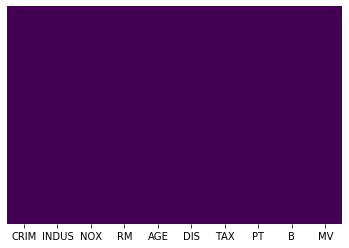

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# 2) EDA

# checking the data dtypes of the columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 10 columns):
CRIM     506 non-null float64
INDUS    506 non-null float64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
MV       506 non-null float64
dtypes: float64(9), int64(1)
memory usage: 39.7 KB


# checking the various basic stats of the data 

##### we can find that there are alot of features that are acatually skewed , for any machine learning model we have to make our data normally distributed. we are supposed to treat each feature in way that there distribution is as normal as possible ,most common ways of making skewed data normal is by using functions like log, square or cube. Here, we have used log on all the features (for simplicity sake) and we can see that most of the features that were skewed become normally distributed.

In [7]:
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674030,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148862,2.105710,168.537116,2.164946,91.294863,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377487,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440002,21.200001
75%,3.677083,18.100000,0.624000,6.623500,94.074999,5.188425,666.000000,20.200001,396.225006,25.000000
max,88.976196,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.899994,50.000000


### skewed data

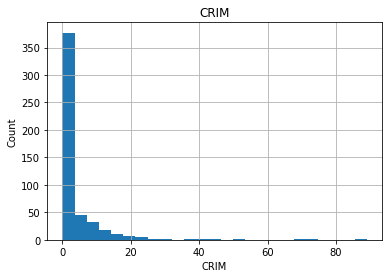

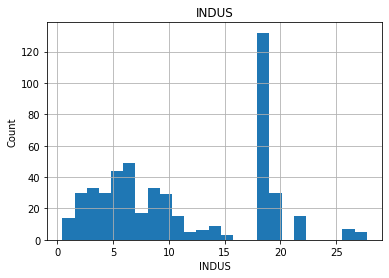

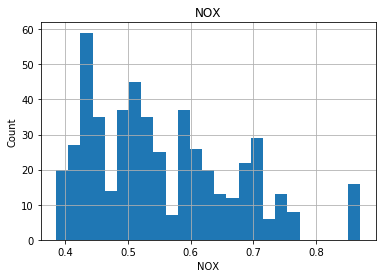

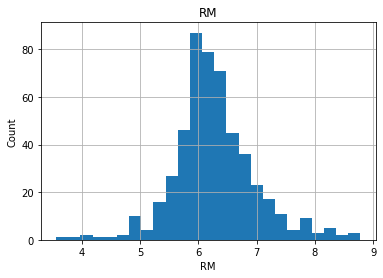

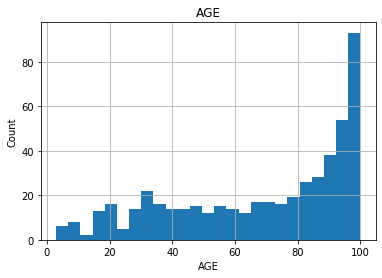

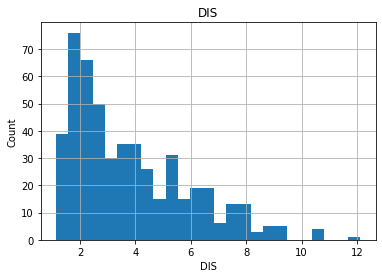

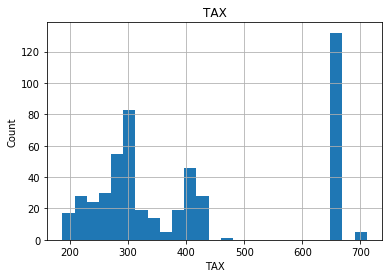

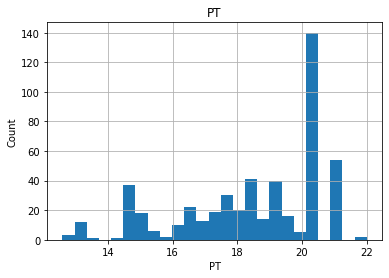

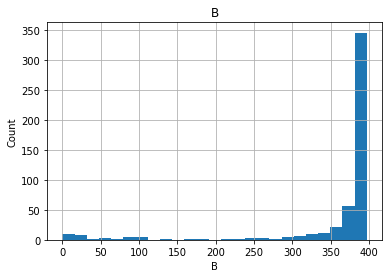

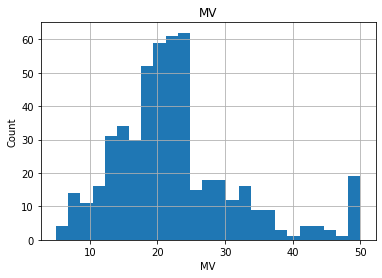

In [8]:
for feature in df.columns:
    
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### normally distributed (after applying log function)

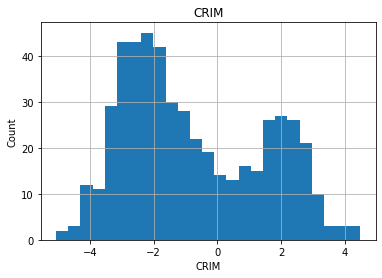

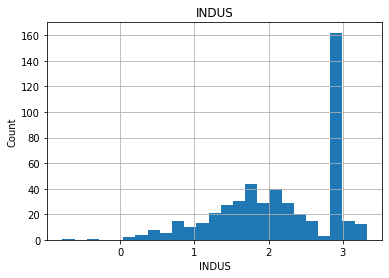

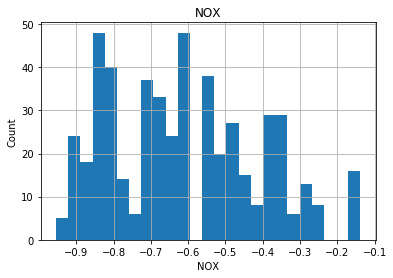

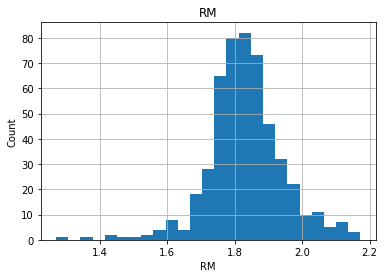

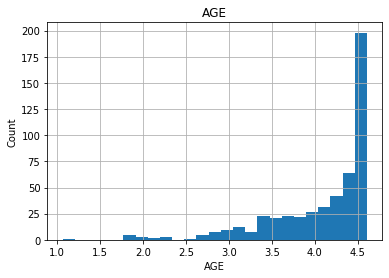

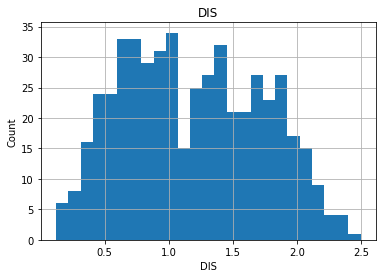

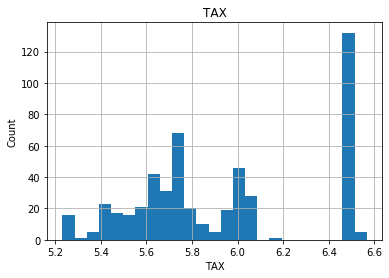

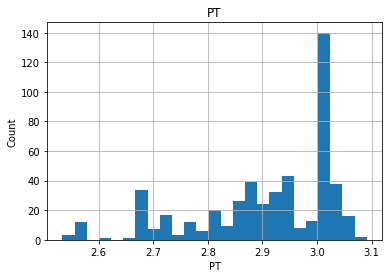

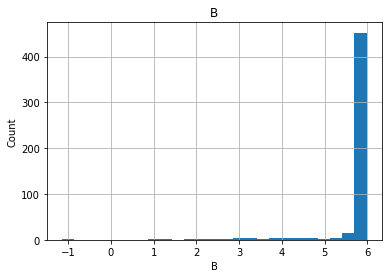

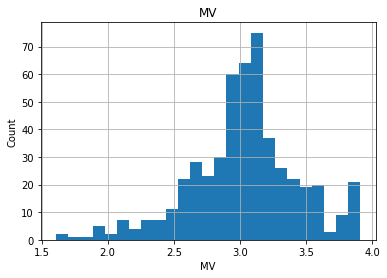

In [9]:
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

# checking the correlation between MV and  other features

In [10]:
def Show_HeatMap(x):
    f,ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(x.corr().round(2),annot=True,ax=ax);

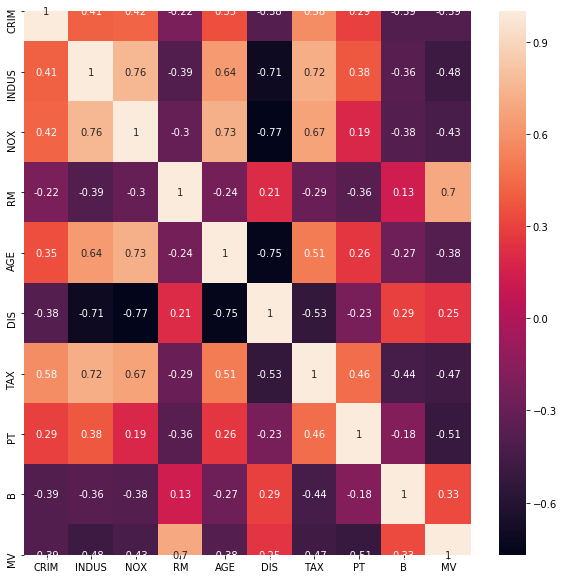

In [11]:
Show_HeatMap(df)

In [12]:
df.corr().round(2)

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
CRIM,1.00,0.41,0.42,-0.22,0.35,-0.38,0.58,0.29,-0.39,-0.39
INDUS,0.41,1.00,0.76,-0.39,0.64,-0.71,0.72,0.38,-0.36,-0.48
NOX,0.42,0.76,1.00,-0.30,0.73,-0.77,0.67,0.19,-0.38,-0.43
RM,-0.22,-0.39,-0.30,1.00,-0.24,0.21,-0.29,-0.36,0.13,0.70
AGE,0.35,0.64,0.73,-0.24,1.00,-0.75,0.51,0.26,-0.27,-0.38
DIS,-0.38,-0.71,-0.77,0.21,-0.75,1.00,-0.53,-0.23,0.29,0.25
TAX,0.58,0.72,0.67,-0.29,0.51,-0.53,1.00,0.46,-0.44,-0.47
PT,0.29,0.38,0.19,-0.36,0.26,-0.23,0.46,1.00,-0.18,-0.51
B,-0.39,-0.36,-0.38,0.13,-0.27,0.29,-0.44,-0.18,1.00,0.33
MV,-0.39,-0.48,-0.43,0.70,-0.38,0.25,-0.47,-0.51,0.33,1.00


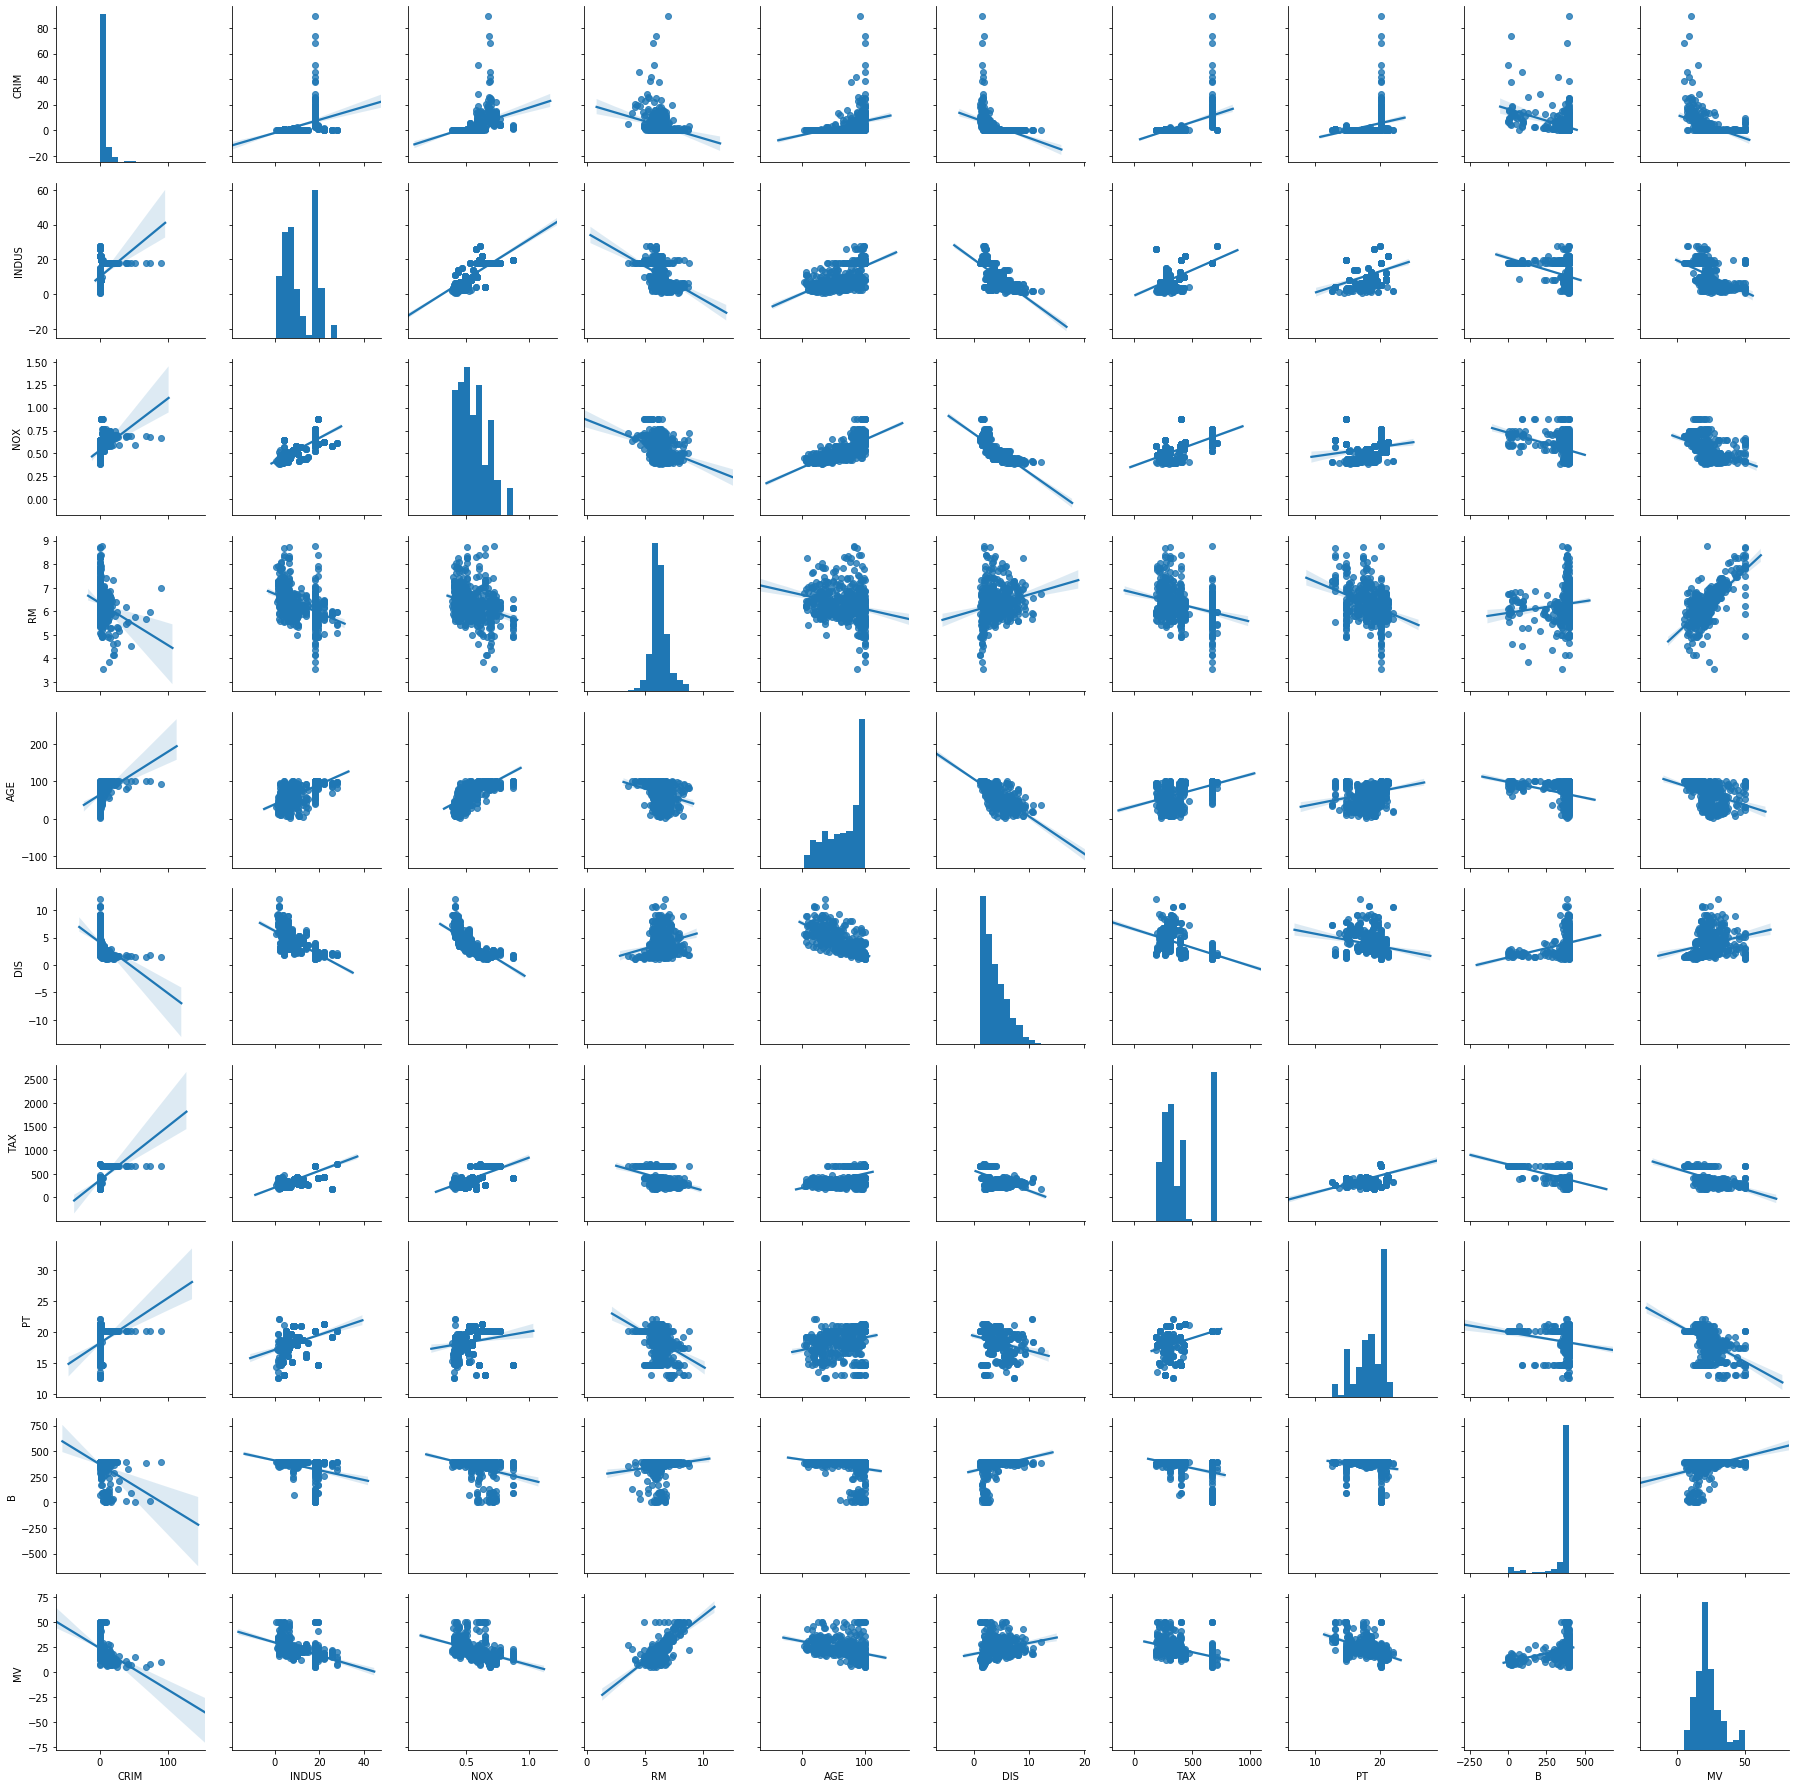

In [13]:
sns.pairplot(df,kind='reg')

# checking the outliers
##### outliers in dataset cause the model to give inaccurate predictions. outliers must be treated either by removing those values completely from the dataset or by replacing it by the median value of the features. Here, we havent treated the outliers as they are many features with many outliers ,removing them completely or replacing them would make that particular column unnecessary. we can see the outliers in different features using boxplot.

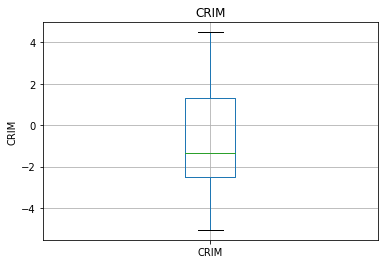

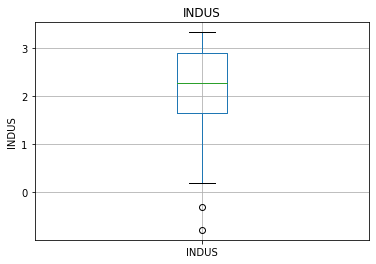

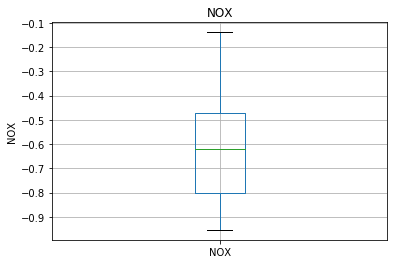

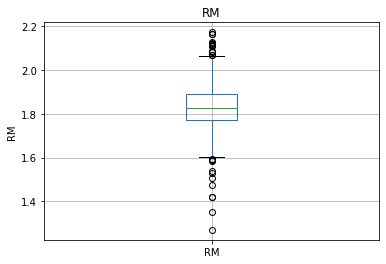

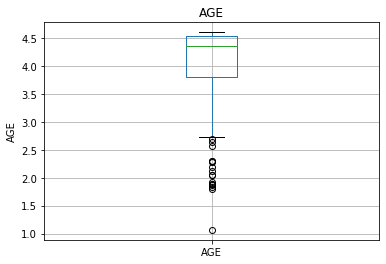

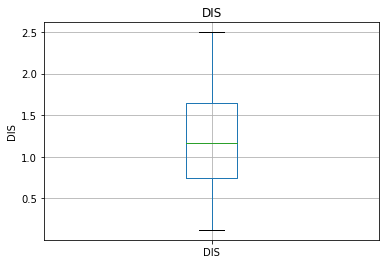

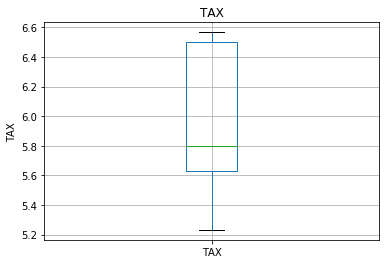

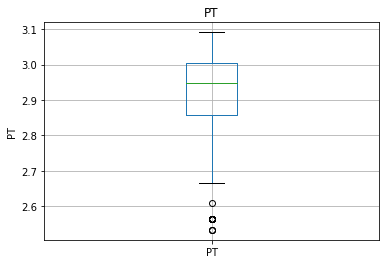

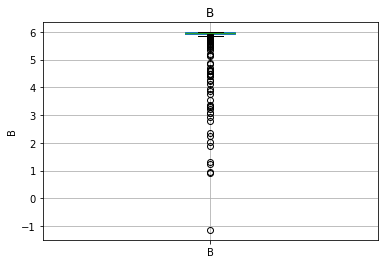

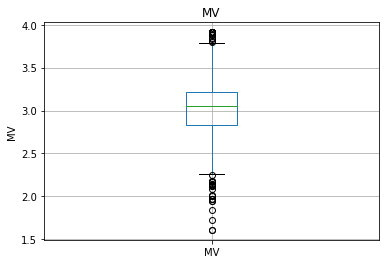

In [14]:
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# 3) DATA ENGINEERING

In [15]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,0.00632,2.31,0.538,6.575,65.199997,4.0900,296,15.300000,396.899994,24.000000
1,0.02731,7.07,0.469,6.421,78.900002,4.9671,242,17.799999,396.899994,21.600000
2,0.02729,7.07,0.469,7.185,61.099998,4.9671,242,17.799999,392.829987,34.700001
3,0.03237,2.18,0.458,6.998,45.799999,6.0622,222,18.700001,394.630005,33.400002
4,0.06905,2.18,0.458,7.147,54.200001,6.0622,222,18.700001,396.899994,36.200001


##### we saw earlier that after applying the log function our dataset became more normally distributed , hence we are converting our whole data set using log function.

In [16]:
data=np.log(df)
data

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B,MV
0,-5.064036,0.837247,-0.619897,1.883275,4.177459,1.408545,5.690359,2.727853,5.983684,3.178054
1,-3.600502,1.955861,-0.757152,1.859574,4.368181,1.602836,5.488938,2.879198,5.983684,3.072693
2,-3.601235,1.955861,-0.757152,1.971996,4.112512,1.602836,5.488938,2.879198,5.973377,3.546740
3,-3.430523,0.779325,-0.780886,1.945624,3.824284,1.802073,5.402677,2.928524,5.977949,3.508556
4,-2.672924,0.779325,-0.780886,1.966693,3.992681,1.802073,5.402677,2.928524,5.983684,3.589059
...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,2.479056,-0.556870,1.886008,4.235555,0.907694,5.609472,3.044522,5.971236,3.109061
502,-3.095111,2.479056,-0.556870,1.811562,4.339902,0.827459,5.609472,3.044522,5.983684,3.025291
503,-2.800824,2.479056,-0.556870,1.942476,4.510860,0.773574,5.609472,3.044522,5.983684,3.173878
504,-2.211009,2.479056,-0.556870,1.916040,4.492002,0.870833,5.609472,3.044522,5.974954,3.091042


# scaling the data
##### we are scaling the data becasue all of the features in the model have a different measurement system or units . commonly used scaling methods are minmax scaler(converts into values between 0 to 1) , standard scalar (converts using normal standard distribution)  etc . Here, i have used minmax scaler as it was me giving me better results.
log function  squeezes the larger data points into smaller ones and gives a better range of values , this cannot be taken as scaling

In [17]:
feature_scale=[feature for feature in data.columns if feature not in ['MV']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaler.transform(data[feature_scale])

array([[0.        , 0.39366118, 0.40986744, ..., 0.34386289, 0.34835835,
        1.        ],
       [0.15321103, 0.66653327, 0.24174401, ..., 0.19304889, 0.61990543,
        1.        ],
       [0.15313433, 0.66653327, 0.24174401, ..., 0.19304889, 0.61990543,
        0.99855296],
       ...,
       [0.23692593, 0.79416054, 0.48706894, ..., 0.28329847, 0.91653291,
        1.        ],
       [0.29867106, 0.79416054, 0.48706894, ..., 0.28329847, 0.91653291,
        0.99877437],
       [0.21095357, 0.79416054, 0.48706894, ..., 0.28329847, 0.91653291,
        1.        ]])

# our final dataset

In [19]:
data1 = pd.concat([data[['MV']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)
data1.head()

,MV,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B
0,3.178054,0.000000,0.393661,0.409867,0.679532,0.879193,0.542096,0.343863,0.348358,1.000000
1,3.072693,0.153211,0.666533,0.241744,0.653269,0.933063,0.623954,0.193049,0.619905,1.000000
2,3.546740,0.153134,0.666533,0.241744,0.777845,0.860849,0.623954,0.193049,0.619905,0.998553
3,3.508556,0.171005,0.379532,0.212673,0.748622,0.779439,0.707895,0.128462,0.708406,0.999195
4,3.589059,0.250315,0.379532,0.212673,0.771968,0.827003,0.707895,0.128462,0.708406,1.000000


# seperating the target and features in our dataset

In [20]:
features=data1.iloc[:, 1:]
target=data1['MV']

# splitting our target, features  for training and testing each 

In [21]:
import sklearn.model_selection as model_selection
X_trainlr,X_testlr,y_trainlr, y_testlr = model_selection.train_test_split(features,target,test_size=0.20,random_state=400)

##### when we use linear regression using the stats library we have to add constant to our dataset.

In [22]:
X_trainlr1 = sm.add_constant(X_trainlr)
X_trainlr1

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PT,B
377,1.0,0.769315,0.895847,0.680459,0.715839,0.996590,0.077585,0.951045,0.846846,1.000000
266,1.0,0.504884,0.525758,0.635845,0.751153,0.952764,0.267795,0.258198,0.056074,0.995387
183,1.0,0.289168,0.409008,0.290388,0.677507,0.987291,0.389463,0.023647,0.619905,1.000000
425,1.0,0.819464,0.895847,0.694976,0.558747,0.986699,0.221202,0.951045,0.846846,0.446160
69,1.0,0.315058,0.629332,0.074071,0.556678,0.686859,0.737143,0.458560,0.727493,1.000000
...,...,...,...,...,...,...,...,...,...,...
140,1.0,0.400869,0.942224,0.591509,0.609801,0.981319,0.149798,0.635555,0.933540,0.996845
441,1.0,0.768252,0.895847,0.800353,0.650677,0.991979,0.254185,0.951045,0.846846,0.996076
318,1.0,0.434737,0.748661,0.423452,0.646518,0.887727,0.480357,0.363831,0.679388,0.999401
463,1.0,0.714536,0.895847,0.754825,0.669033,0.969927,0.382690,0.951045,0.846846,0.998906


# 4) MODEL BUILDING USING DIFFERENT TYPES OF LINEAR REGRESSION 
#####  when there is high error in training model prediction it is said to have HIGH BIAS. when there is high error in test model prediction it is called HIGH VARIANCE.
#####  in every linear regression model we have to check whether the model is underfiting or overfitting. when the accuracy of the training model is low and the accuracy of test model is low then we call it UNDERFIT( high bias and high variance). when the accuracy of the training model is high and the score of test model is low then we call it OVERFIT( low bias and high variance).  when the training and test score is similar we can tell that we have a GOOD MODEL(low bias and low variance).


# 4.1) linear reg using statsmodel


In [23]:
import statsmodels.api as sm
model= sm.OLS(y_trainlr,X_trainlr1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     72.13
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           9.25e-78
Time:                        18:49:33   Log-Likelihood:                -25.176
No. Observations:                 404   AIC:                             70.35
Df Residuals:                     394   BIC:                             110.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6899      0.241     11.152      0.000       2.216       3.164
CRIM          -0.1114      0.128     -0.869      0.386      -0.364       0.141
INDUS         -0.0490      0.126     -0.389      0.698      -0.297       0.199
NOX           -0.4615      0.126     -3.670      0.000      -0.709      -0.214
RM             1.5280      0.121     12.666      0.000       1.291       1.765
AGE           -0.3195      0.121     -2.639      0.009      -0.558      -0.081
DIS           -0.4823      0.123     -3.929      0.000      -0.724      -0.241
TAX           -0.1800      0.078     -2.311      0.021      -0.333      -0.027
PT            -0.3741      0.071     -5.286      0.000      -0.513      -0.235
B              0.5260      0.125      4.225      0.000       0.281       0.771
==============================================================================
Omnibus:                       66.562   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              635.532
Skew:                           0.299   Prob(JB):                    9.91e-139
Kurtosis:                       9.115   Cond. No.                         48.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  Ho = there is no strong relation bewteen the parameters
#####   Ha= there is a strong relation between the parameters 
##### since the confindence value is greater  than normal standard or the pvalue is lower than the significance value (5%) hence we will reject Ho and accept Ha . Therefore, there is a strong relationship between the 2 parameters 
##### after our test we can see that the only values that are significantly related to our target variable are NOX,RM,DIS,PT,B

In [24]:
X_trainlr1 = X_trainlr.drop(["CRIM","INDUS","TAX","AGE"],axis=1)
X_trainlr1 = sm.add_constant(X_trainlr1)
X_trainlr1


,const,NOX,RM,DIS,PT,B
377,1.0,0.680459,0.715839,0.077585,0.846846,1.000000
266,1.0,0.635845,0.751153,0.267795,0.056074,0.995387
183,1.0,0.290388,0.677507,0.389463,0.619905,1.000000
425,1.0,0.694976,0.558747,0.221202,0.846846,0.446160
69,1.0,0.074071,0.556678,0.737143,0.727493,1.000000
...,...,...,...,...,...,...
140,1.0,0.591509,0.609801,0.149798,0.933540,0.996845
441,1.0,0.800353,0.650677,0.254185,0.846846,0.996076
318,1.0,0.423452,0.646518,0.480357,0.679388,0.999401
463,1.0,0.754825,0.669033,0.382690,0.846846,0.998906


In [25]:
import statsmodels.api as sm
model1= sm.OLS(y_trainlr,X_trainlr1).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.15e-78
Time:                        18:49:33   Log-Likelihood:                -33.682
No. Observations:                 404   AIC:                             79.36
Df Residuals:                     398   BIC:                             103.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2338      0.193     11.549      0.000       1.854       2.614
NOX           -0.7089      0.107     -6.618      0.000      -0.920      -0.498
RM             1.5410      0.120     12.858      0.000       1.305       1.777
DIS           -0.3346      0.113     -2.957      0.003      -0.557      -0.112
PT            -0.4778      0.065     -7.380      0.000      -0.605      -0.350
B              0.6298      0.121      5.198      0.000       0.392       0.868
==============================================================================
Omnibus:                       55.134   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.333
Skew:                           0.042   Prob(JB):                    1.11e-105
Kurtosis:                       8.358   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# checking the r sqaure value of ols train

In [26]:
from sklearn.metrics import r2_score
predictionsolstrain = model1.predict(X_trainlr1)
scoreolstrain=r2_score(y_trainlr, predictionsolstrain)
scoreolstrain.round(3)

0.606

# checking the r sqaure value of ols test

In [27]:
X_testlr1 = X_testlr.drop(["CRIM","INDUS","TAX","AGE"],axis=1)
X_testlr1 = sm.add_constant(X_testlr1)
X_testlr1


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,NOX,RM,DIS,PT,B
70,1.0,0.085993,0.652578,0.650274,0.755749,0.995263
422,1.0,0.571720,0.511128,0.230282,0.846846,0.956694
181,1.0,0.290388,0.604403,0.350887,0.619905,1.000000
67,1.0,0.074071,0.555359,0.737143,0.727493,0.999756
395,1.0,0.719975,0.661864,0.178540,0.846846,0.998249
...,...,...,...,...,...,...
265,1.0,0.635845,0.493727,0.237836,0.056074,0.998399
404,1.0,0.719975,0.487932,0.148620,0.846846,0.973856
437,1.0,0.800353,0.605845,0.222216,0.846846,0.473332
289,1.0,0.062033,0.677845,0.787167,0.494677,0.990798


In [28]:
from sklearn.metrics import r2_score
predictionsols = model1.predict(X_testlr1)
scoreols=r2_score(y_testlr, predictionsols)
scoreols.round(3)



0.548

##### the ols model seems to be decent as the scores of train and test are similar but not accurate predictions.

# predicted values using ols 

In [29]:
pd.DataFrame({'actual value': y_testlr, 'predictions':predictionsols}).sample(5)

,actual value,predictions
187,3.465736,3.521559
404,2.140066,2.634260
114,2.917771,3.124723
56,3.206803,3.238259
180,3.683867,3.567487


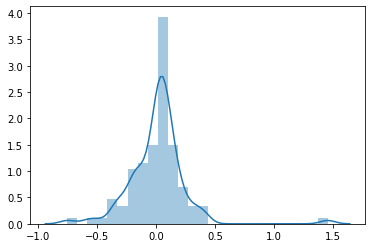

In [30]:
sns.distplot(y_testlr-predictionsols)

# 4.2) linear reg using skitlearn
##### in linear regression , the best fit line is found using the gradient descent which finds the line with the minimum square mean error 

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_trainlr, y_trainlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# checking the r sqaure value of train

In [32]:
from sklearn.metrics import r2_score
predictionslrtrain = regressor.predict(X_trainlr)
scorelrtrain=r2_score(y_trainlr, predictionslrtrain)
scorelrtrain.round(3)

0.622

# checking the r sqaure value of test

In [33]:
from sklearn.metrics import r2_score
predictionslr = regressor.predict(X_testlr)
scorelr=r2_score(y_testlr, predictionslr)
scorelr.round(3)


0.58

##### the linear reg model seems to be decent as the scores of train and test are similar but not accurate predictions.

# predicted values using linear reg

In [34]:
pd.DataFrame({'actual value': y_testlr, 'predictions':predictionslr}).sample(5)

,actual value,predictions
299,3.367296,3.598818
451,2.721295,2.840309
264,3.597312,3.548547
106,2.970414,2.923807
408,2.844909,2.739203


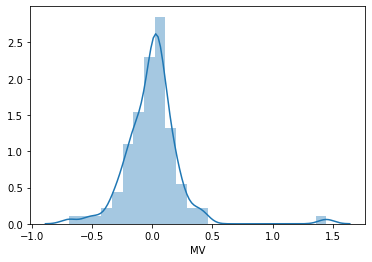

In [35]:
sns.distplot(y_testlr-predictionslr)

# 4.3) Ridge reg using skitlearn
##### ridge regression is a hyperparameter tuning techinque. sometimes linear models go through overfitting or underfitting . To take care of this we can use ridge or lasso regression. these techniques penalize the model to reduce the steepness of the slope by reducing the values of the feautres but it never becomes 0. 
##### the gridsearchcv fucntion is used to test the ridge regression model for various penalizing values(alpha) . the gridsearchcv goes thorough all the different penalzing values and selects the best penalizing value for the ridge regression model. if the score of the model is closer to 0 it better as it lesser errors

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_trainlr, y_trainlr)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 0.01}
-0.07216971044565405


# checking the r sqaure value of train

In [37]:
from sklearn.metrics import r2_score
predictionsrrtrain = ridge_regressor.predict(X_trainlr)
scorerrtrain=r2_score(y_trainlr, predictionsrrtrain)
scorerrtrain.round(3)

0.622

# checking the r sqaure value of test

In [38]:
from sklearn.metrics import r2_score
predictionsrr = ridge_regressor.predict(X_testlr)
scorerr=r2_score(y_testlr, predictionsrr)
scorerr.round(3)


0.58

##### the ridge reg model seems to be decent as the scores of train and test are similar but not accurate predictions.

# predicted values using ridge reg

In [39]:
pd.DataFrame({'actual value': y_testlr, 'predictions ridge':predictionsrr}).sample(5)

,actual value,predictions ridge
88,3.161247,3.364266
418,2.174752,2.476098
230,3.190476,3.047587
217,3.356897,3.240636
488,2.721295,2.689166


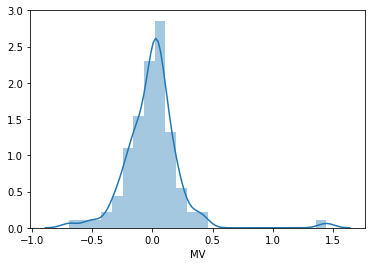

In [40]:
sns.distplot(y_testlr-predictionsrr)

# 4.4)Lasso reg using skitlearn
##### ridge regression is a hyperparameter tuning techinque. sometimes linear models go through overfitting or underfitting . To take care of this we can use ridge or lasso regression. these techniques penalize the model to reduce the steepness of the slope by reducing the values of the feautres,some features might become 0 
##### the gridsearchcv fucntion is used to test the ridge regression model for various penalizing values(alpha) . the gridsearchcv goes thorough all the different penalzing values and selects the best penalizing value for the ridge regression modelif the score of the model is closer to 0 it better as it lesser errors
##### we are using selectfrommodel function to check which features are used by the lasso regression.

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_trainlr, y_trainlr)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.07218745002349622


##### we can see that there is true for all columns in dataset. this tells us the lasso regression model with this alpha value is considering all features necessary for prediction.

In [42]:
lasso_regressor_features =SelectFromModel(Lasso(alpha=1e-08, random_state=0))
lasso_regressor_features.fit(X_trainlr, y_trainlr)
lasso_regressor_features.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

# checking the r sqaure value of train

In [43]:
from sklearn.metrics import r2_score
predictionslassotrain = lasso_regressor.predict(X_trainlr)
scorelassotrain=r2_score(y_trainlr, predictionslassotrain)
scorelassotrain.round(3)

0.622

# checking the r sqaure value of test

In [44]:
from sklearn.metrics import r2_score
predictionslasso = lasso_regressor.predict(X_testlr)
scorelasso=r2_score(y_testlr, predictionslasso)
scorelasso.round(3)


0.58

##### the lasso reg model seems to be decent as the scores of train and test are similar but not accurate predictions.

# predicted values using lasso reg

In [45]:
pd.DataFrame({'actual value': y_testlr, 'predictions ridge':predictionslasso}).sample(5)

,actual value,predictions ridge
374,2.624669,2.212898
269,3.030134,3.093017
306,3.508556,3.524236
164,3.122365,3.014740
275,3.465736,3.398399


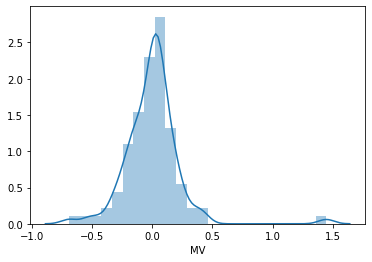

In [46]:
sns.distplot(y_testlr-predictionslasso)

# 5)BEST MODEL

In [49]:
Best_Model =pd.DataFrame({'Model':['ols','linear reg','ridge reg', 'lasso reg'],
             'R2_Score train ':[scoreolstrain.round(3),scorelrtrain.round(3),scorerrtrain.round(3),scorelassotrain.round(3)],
            'R2_Score test':[scoreols.round(3),scorelr.round(3),scorerr.round(3),scorelasso.round(3)],
             'difference in test and train':[scoreolstrain.round(3)-scoreols.round(3),scorelrtrain.round(3)-scorelr.round(3),scorerrtrain.round(3)-scorerr.round(3),scorelassotrain.round(3)-scorelasso.round(3)]})
Best_Model_df = Best_Model.sort_values(by='R2_Score test', ascending=False)
Best_Model_df = Best_Model_df.set_index('Model')
Best_Model_df

,R2_Score train,R2_Score test,difference in test and train
Model,,,
linear reg,0.622,0.580,0.042
ridge reg,0.622,0.580,0.042
lasso reg,0.622,0.580,0.042
ols,0.606,0.548,0.058


##### since all the models used are linear regression models the difference between the scores would be very low , hence we it would not matter which model we take here.